[0.25 0.25 0.25 0.25]
[array([ -7.48177328, -43.30108951]), array([-32.54451927,   3.0991768 ]), array([-0.98957165, 37.36564372]), array([41.0158642 ,  2.83626898])]
[array([[596.51446769, -97.38122298],
       [-97.38122298,  70.12428438]]), array([[ 229.06267779, -106.82064316],
       [-106.82064316,  422.15817151]]), array([[436.85397986, 148.60965854],
       [148.60965854, 322.83954932]]), array([[ 248.06205823, -175.62475341],
       [-175.62475341,  379.20473545]])]
[[ -11.09686884  -17.19693761  -35.65323501  -55.23054425]
 [ -11.23496982  -17.10112183  -35.32915364  -57.33720546]
 [ -11.14973778  -20.94275679  -41.53474439  -39.31223209]
 ...
 [-107.87282887  -49.2505179   -22.36784829  -12.95192813]
 [-112.59965795  -48.03150813  -21.04001118  -12.92004203]
 [-108.53199806  -50.83355232  -23.05699435  -13.32403395]]
[[991.   9.   0.   0.]
 [140. 799.  61.   0.]
 [  0. 155. 762.  83.]
 [  0.   0. 149. 851.]]


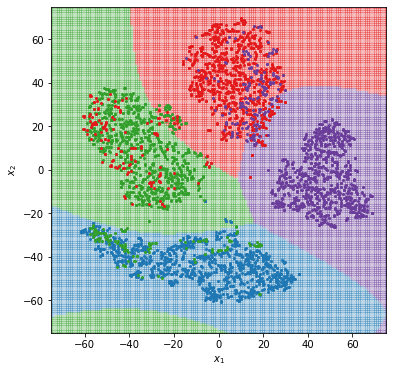

[[1077.11571003   17.87397183]
 [  17.87397183 1120.76954642]]


LinAlgError: 1-dimensional array given. Array must be at least two-dimensional

In [16]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as linalg
import pandas as pd



X_train = np.genfromtxt(fname = "hw02_data_points.csv", delimiter = ",", dtype = float)
y_train = np.genfromtxt(fname = "hw02_class_labels.csv", delimiter = ",", dtype = int)



# STEP 3
# assuming that there are K classes
# should return a numpy array with shape (K,)
def estimate_prior_probabilities(y):
    # your implementation starts below
    unique_classes, class_counts = np.unique(y, return_counts=True)
    total_samples = len(y)
    class_priors = class_counts / total_samples
    
    # your implementation ends above
    return(class_priors)

class_priors = estimate_prior_probabilities(y_train)
print(class_priors)



# STEP 4
# assuming that there are K classes and D features
# should return a numpy array with shape (K, D)
def estimate_class_means(X, y):
    # your implementation starts below
    unique_classes = np.unique(y)
    sample_means = []
    for c in unique_classes:
        sample_means.append(np.mean(X[y == c], axis=0))
    # your implementation ends above
    return(sample_means)

sample_means = estimate_class_means(X_train, y_train)
print(sample_means)



# STEP 5
# assuming that there are K classes and D features
# should return a numpy array with shape (K, D, D)
def estimate_class_covariances(X, y):
    # your implementation starts below
    unique_classes = np.unique(y)
    sample_covariances = []
    for c in unique_classes:
        class_samples = X[y == c]
        sample_covariance = np.cov(class_samples, rowvar=False)
        sample_covariances.append(sample_covariance)
    # your implementation ends above
    return(sample_covariances)

sample_covariances = estimate_class_covariances(X_train, y_train)
print(sample_covariances)



# STEP 6
# assuming that there are N data points and K classes
# should return a numpy array with shape (N, K)
def calculate_score_values(X, class_means, class_covariances, class_priors):
    # your implementation starts below
    num_classes = len(class_means)
    num_samples = X.shape[0]
    score_values = np.zeros((num_samples, num_classes))
    
    for c in range(num_classes):
        # Calculate the term inside the exponential function
        term1 = -2 * np.log(2 * np.pi) - 0.5 * np.log(np.linalg.det(class_covariances[c]))
        term2 = np.sum(np.dot((X - class_means[c]), np.linalg.inv(class_covariances[c])) * (X - class_means[c]), axis=1)
        log_likelihood = term1 - term2
        score_values[:, c] = log_likelihood + np.log(class_priors[c])
    
    # your implementation ends above
    return(score_values)

scores_train = calculate_score_values(X_train, sample_means,
                                      sample_covariances, class_priors)
print(scores_train)



# STEP 7
# assuming that there are K classes
# should return a numpy array with shape (K, K)
def calculate_confusion_matrix(y_truth, scores):
    # your implementation starts below
    num_classes = scores.shape[1]
    predicted_labels = np.argmax(scores, axis=1) + 1  
    confusion_matrix = np.zeros((num_classes, num_classes))

    for true_label, predicted_label in zip(y_truth, predicted_labels):
        confusion_matrix[true_label - 1, predicted_label - 1] += 1  

    # your implementation ends above
    return(confusion_matrix)

confusion_train = calculate_confusion_matrix(y_train, scores_train)
print(confusion_train)



def draw_classification_result(X, y, class_means, class_covariances, class_priors):
    class_colors = np.array(["#1f78b4", "#33a02c", "#e31a1c", "#6a3d9a"])
    K = np.max(y)

    x1_interval = np.linspace(-75, +75, 151)
    x2_interval = np.linspace(-75, +75, 151)
    x1_grid, x2_grid = np.meshgrid(x1_interval, x2_interval)
    X_grid = np.vstack((x1_grid.flatten(), x2_grid.flatten())).T
    scores_grid = calculate_score_values(X_grid, class_means, class_covariances, class_priors)

    score_values = np.zeros((len(x1_interval), len(x2_interval), K))
    for c in range(K):
        score_values[:,:,c] = scores_grid[:, c].reshape((len(x1_interval), len(x2_interval)))

    L = np.argmax(score_values, axis = 2)

    fig = plt.figure(figsize = (6, 6))
    for c in range(K):
        plt.plot(x1_grid[L == c], x2_grid[L == c], "s", markersize = 2, markerfacecolor = class_colors[c], alpha = 0.25, markeredgecolor = class_colors[c])
    for c in range(K):
        plt.plot(X[y == (c + 1), 0], X[y == (c + 1), 1], ".", markersize = 4, markerfacecolor = class_colors[c], markeredgecolor = class_colors[c])
    plt.xlim((-75, 75))
    plt.ylim((-75, 75))
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.show()
    return(fig)
    
fig = draw_classification_result(X_train, y_train, sample_means, sample_covariances, class_priors)
fig.savefig("hw02_result_different_covariances.pdf", bbox_inches = "tight")



# STEP 8
# assuming that there are K classes and D features
# should return a numpy array with shape (K, D, D)
def estimate_shared_class_covariance(X, y):
    # your implementation starts below
    shared_covariance = np.cov(X, rowvar=False)
    return shared_covariance
    # your implementation ends above
    return(sample_covariances)

sample_covariances = estimate_shared_class_covariance(X_train, y_train)
print(sample_covariances)

scores_train = calculate_score_values(X_train, sample_means,
                                      sample_covariances, class_priors)
print(scores_train)

confusion_train = calculate_confusion_matrix(y_train, scores_train)
print(confusion_train)

fig = draw_classification_result(X_train, y_train, sample_means, sample_covariances, class_priors)
fig.savefig("hw02_result_shared_covariance.pdf", bbox_inches = "tight")
